In [1]:
! cat small-jersey2.json | rio zonalstats -r s3://dev-et-data/enduser/DelawareRiverBasin/Run09_13_2020/ward_sandford_customer/2000/etasw_200003.tif

{"type": "FeatureCollection", "features": [{"type": "Feature", "properties": {"_min": -50.120000000000005, "_max": 67.57233817633218, "_mean": 45.26584214613251, "_count": 81846}, "geometry": {"type": "Polygon", "coordinates": [[[-75.30029296875, 38.993572058209466], [-74.46533203125, 38.993572058209466], [-74.46533203125, 39.605688178320804], [-75.30029296875, 39.605688178320804], [-75.30029296875, 38.993572058209466]]]}}]}


In [2]:
import xarray as xr
da = xr.open_rasterio('s3://dev-et-data/enduser/DelawareRiverBasin/Run09_13_2020/ward_sandford_customer/2000/etasw_200003.tif')

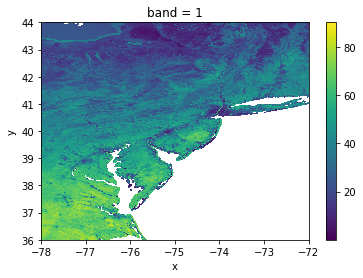

In [3]:
da_masked = da.where(da>0.0)
da_masked.plot(cmap='viridis')

In [4]:
! cat small-jersey2.json | rio zonalstats -r s3://dev-et-data/enduser/DelawareRiverBasin/Run09_13_2020/ward_sandford_customer/2000/srf_200003.tif

{"type": "FeatureCollection", "features": [{"type": "Feature", "properties": {"_min": 0.0, "_max": 54.2557709578661, "_mean": 28.542486415809037, "_count": 79811}, "geometry": {"type": "Polygon", "coordinates": [[[-75.30029296875, 38.993572058209466], [-74.46533203125, 38.993572058209466], [-74.46533203125, 39.605688178320804], [-75.30029296875, 39.605688178320804], [-75.30029296875, 38.993572058209466]]]}}]}


In [5]:
!ls

small-jersey2.json  upside-down.ipynb  zonal-revisited.ipynb


In [6]:
!cat small-jersey2.json

{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              -75.30029296875,
              38.993572058209466
            ],
            [
              -74.46533203125,
              38.993572058209466
            ],
            [
              -74.46533203125,
              39.605688178320804
            ],
            [
              -75.30029296875,
              39.605688178320804
            ],
            [
              -75.30029296875,
              38.993572058209466
            ]
          ]
        ]
      }
    }
  ]
}

In [7]:
import rasterio
import json
import rasterio.mask
with open('small-jersey2.json') as f:
  geoms = json.load(f)
print(geoms)
print(type(geoms))
rgeoms = [geoms['features'][0]['geometry']]
print (rgeoms)
tif = 's3://dev-et-data/enduser/DelawareRiverBasin/Run09_13_2020/ward_sandford_customer/2000/etasw_200003.tif'
with rasterio.open(tif) as src:
     out_image, out_transform = rasterio.mask.mask(src, rgeoms, crop=True)   

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-75.30029296875, 38.993572058209466], [-74.46533203125, 38.993572058209466], [-74.46533203125, 39.605688178320804], [-75.30029296875, 39.605688178320804], [-75.30029296875, 38.993572058209466]]]}}]}
<class 'dict'>
[{'type': 'Polygon', 'coordinates': [[[-75.30029296875, 38.993572058209466], [-74.46533203125, 38.993572058209466], [-74.46533203125, 39.605688178320804], [-75.30029296875, 39.605688178320804], [-75.30029296875, 38.993572058209466]]]}]


In [8]:
out_image.shape

(1, 295, 402)

In [9]:
mary=out_image[0]


In [10]:
mary.shape

(295, 402)

In [11]:
from matplotlib import pyplot


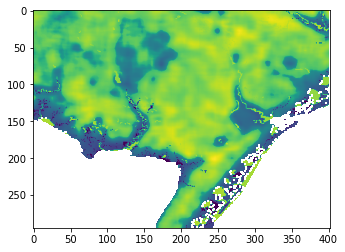

In [12]:
mary[(mary< 0)] = 0
pyplot.imshow(mary, cmap='viridis')
pyplot.show()

In [14]:
#mary.stats()

In [16]:
mary.min()

nan

In [17]:
mary.max()

nan

In [18]:
import numpy as np

mary_sane = np.nan_to_num(mary)

In [19]:
mary_sane.min()

0.0

In [20]:
mary_sane.max()

67.57233817633218

In [21]:
mary.mean()

nan

In [22]:
mary_sane.mean()

31.803963587108335

In [23]:
np.nanmean(mary)

46.082057055875396

In [24]:
! cat small-jersey2.json | rio zonalstats -r s3://dev-et-data/enduser/DelawareRiverBasin/Run09_13_2020/ward_sandford_customer/2000/etasw_200003.tif

{"type": "FeatureCollection", "features": [{"type": "Feature", "properties": {"_min": -50.120000000000005, "_max": 67.57233817633218, "_mean": 45.26584214613251, "_count": 81846}, "geometry": {"type": "Polygon", "coordinates": [[[-75.30029296875, 38.993572058209466], [-74.46533203125, 38.993572058209466], [-74.46533203125, 39.605688178320804], [-75.30029296875, 39.605688178320804], [-75.30029296875, 38.993572058209466]]]}}]}


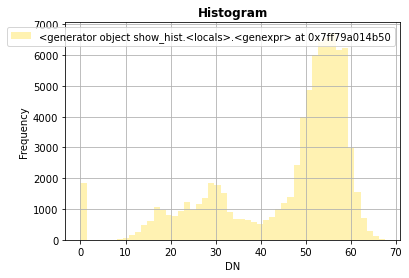

In [25]:
from rasterio.plot import show_hist
    
show_hist(mary, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

In [33]:
for x in range(0,mary.shape[0]):
    for y in range(0,mary.shape[1]):
        #print(mary[x][y])
        #print(y,x)
        if ((mary[x][y] < 1) ):
            print(mary[x][y])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9567377205478735
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.7216557058630573
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

In [27]:
from scipy import stats

stats.describe(mary_sane)

DescribeResult(nobs=295, minmax=(array([ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       

In [28]:
np.nanmin(mary)

0.0

In [29]:
np.nanmax(mary)

67.57233817633218